In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
pd.set_option('display.max_columns', None)

In [224]:
df = pd.read_csv('data_after_feature_engg.csv').drop_duplicates()

In [225]:
df.sample()

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,Chimney,Microwave,Light,Washing Machine,AC,Dining Table,Fridge,Modular Kitchen,Curtains,Wardrobe,Fan,Bed,Exhaust Fan,Sofa,Geyser,Stove,Water Purifier,TV,furnishing_type,luxury_score
2684,ss the leaf,flat,sector 85,2.1,8720.0,2408.0,Super Built up area 2408(223.71 sq.m.)Carpet a...,3,4,3+,6.0,North,Relatively New,2408.0,NaN,1685.0,0,1,0,0,0,0,0,15,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,156


In [226]:
df.shape

(3678, 41)

In [227]:
df.columns

Index(['society', 'property_type', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'puja room', 'others',
       'Chimney', 'Microwave', 'Light', 'Washing Machine', 'AC',
       'Dining Table', 'Fridge', 'Modular Kitchen', 'Curtains', 'Wardrobe',
       'Fan', 'Bed', 'Exhaust Fan', 'Sofa', 'Geyser', 'Stove',
       'Water Purifier', 'TV', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [228]:
df.drop(columns = ['Chimney','Microwave','Light','Washing Machine','AC','Dining Table','Fridge','Modular Kitchen','Curtains','Wardrobe','Fan','Bed','Exhaust Fan','Sofa','Geyser','Stove','Water Purifier','TV'], inplace = True)

In [229]:
df.shape

(3678, 23)

In [230]:
df.columns

Index(['society', 'property_type', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'puja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_79064/3086671257.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

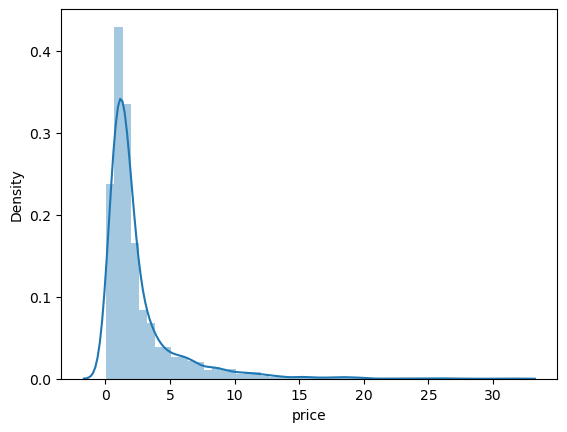

In [231]:
# Outliers on the basis of price column

sns.distplot(df['price'])

<Axes: xlabel='price'>

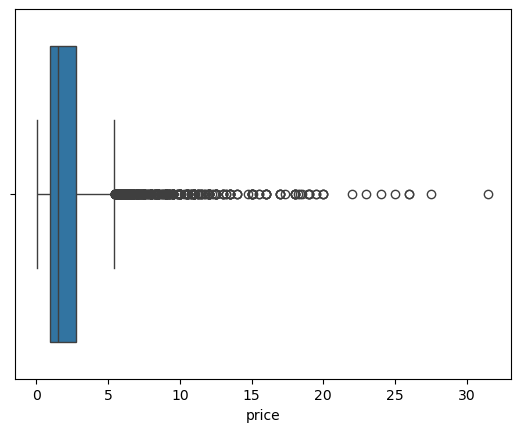

In [232]:
sns.boxplot(x = df['price'])

In [233]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [234]:
# outliers Stats
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [235]:
outliers.sort_values('price', ascending = False).head(20)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
1941,arjun marg/ sector- 26 phase- 1/ golf course road,house,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,0,0,2,74
59,independent,house,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,0,1,1,42
119,dlf city plots,house,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,0,1,1,138
2650,independent,house,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,0,0,1,72
1703,suncity township,house,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,0,0,0,0
3793,emaar the palm springs,house,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,0,0,1,122
1692,independent,house,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,0,0,1,145
3213,vipul tatvam villa,house,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
816,independent,house,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,0,0,2,97
3436,luxury dlf city floors,house,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


In [236]:
# On the basis of price column we can say that there are some genuine outliers but many data errors as well

# Price per sqft 

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_79064/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

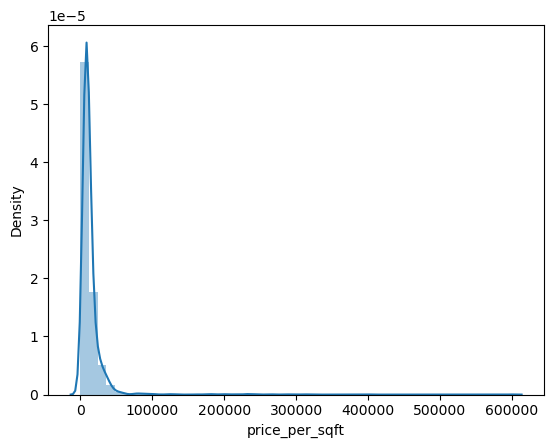

In [238]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

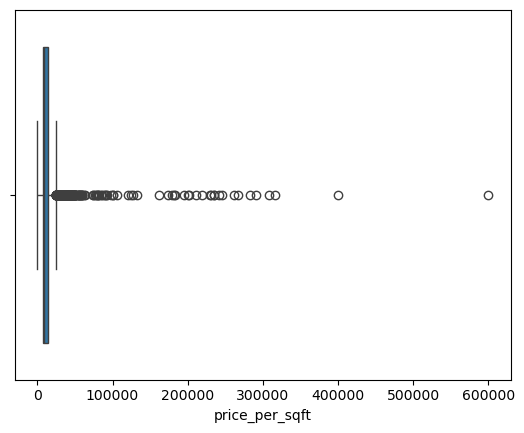

In [239]:
sns.boxplot(x = df['price_per_sqft'])

In [240]:
# Calculate the IQR for the 'price_per_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [241]:
outliers_sqft[outliers_sqft['area'] < 1000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
88,ompee k s residency,flat,new sector 2,1.60,26936.0,594.0,Carpet area: 66 (55.18 sq.m.),2,2,2,1.0,NaN,Relatively New,NaN,NaN,66.0,0,0,0,0,0,0,0
241,independent,house,sector 24,1.45,26852.0,540.0,Plot area 60(50.17 sq.m.),3,3,1,NaN,NaN,Old Property,NaN,540.0,NaN,0,0,0,0,0,0,9
330,huda plot sector 38,house,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,5.0,North-West,Relatively New,NaN,145.0,NaN,0,0,0,0,0,2,7
332,dlf city plots phase 3,house,sector 24,1.60,29629.0,540.0,Plot area 540(50.17 sq.m.)Built Up area: 540 s...,8,5,3+,4.0,East,Old Property,NaN,540.0,500.0,0,0,0,0,0,0,8
453,ambience caitriona,flat,sector 24,14.00,200000.0,700.0,Built Up area: 700 (65.03 sq.m.),4,5,3,3.0,East,Undefined,NaN,700.0,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,independent,house,sector 105,0.38,76000.0,50.0,Carpet area: 50 (4.65 sq.m.),2,2,2,1.0,NaN,Undefined,NaN,NaN,50.0,0,0,0,0,0,0,0
3750,dlf city plots phase 3,house,sector 24,1.44,26667.0,540.0,Plot area 60(50.17 sq.m.),4,2,2,1.0,NaN,Old Property,NaN,540.0,NaN,0,0,0,0,0,0,8
3790,independent,house,sector 43,1.90,35185.0,540.0,Plot area 60(50.17 sq.m.)Built Up area: 60 sq....,3,3,3+,3.0,NaN,Old Property,NaN,60.0,NaN,0,0,0,0,0,2,0
3793,emaar the palm springs,house,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,0,0,1,122


In [242]:
# Observation is that at few places area units are mismatched
# Rooms are too many for less area so may be that is a data error and we need to convert everything to sqft
#Idea is that if area is less than 1000 then that is actually in sq yards 

outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_79064/3748387126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [243]:
# Price per sqft is calculated by price by total area so doing that again for new area conversion

outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_79064/380029908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [244]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [245]:
df.update(outliers_sqft)

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_79064/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

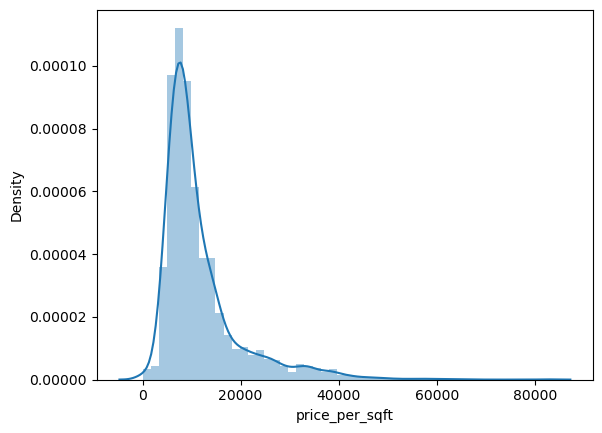

In [246]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

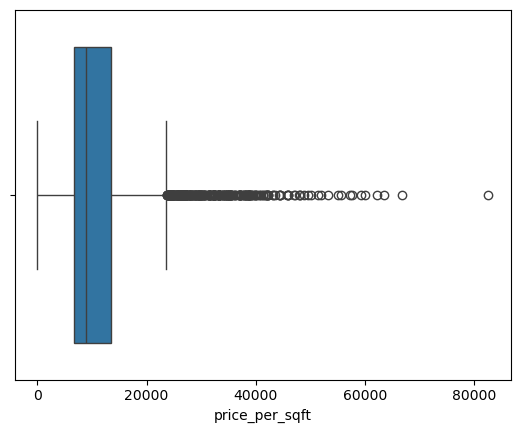

In [247]:
sns.boxplot(x = df['price_per_sqft'])

In [248]:
df[df['price_per_sqft'] > 50000]

# Dropping these rows 

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
32,nul,house,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,0,1,2,137
119,dlf city plots,house,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,0,1,1,138
502,cloudnine cottages,house,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
534,emaar the palm springs,house,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
564,project housing board colony,house,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
650,emaar mgf marbella,house,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,0,0,2,75
992,independent,house,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,0,0,1,72
1360,malibu towne,house,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
2416,unitech vistas,flat,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
2639,independent,house,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,0,0,1,153


In [249]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

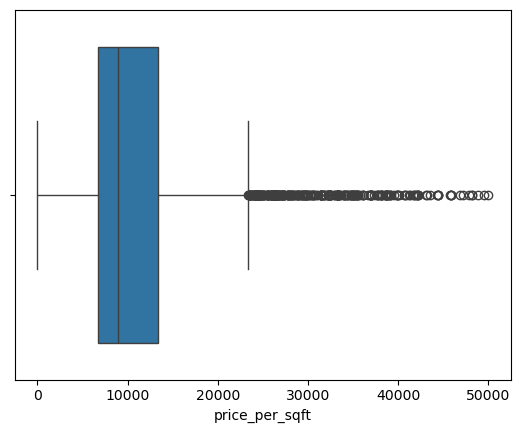

In [250]:
sns.boxplot(x = df['price_per_sqft'])

# Area Column

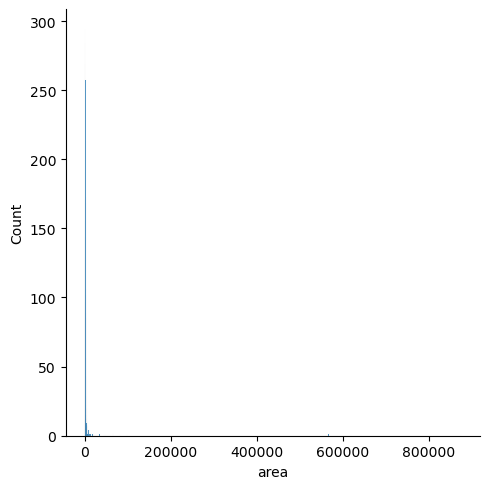

In [252]:
sns.displot(df['area'])

<Axes: xlabel='area'>

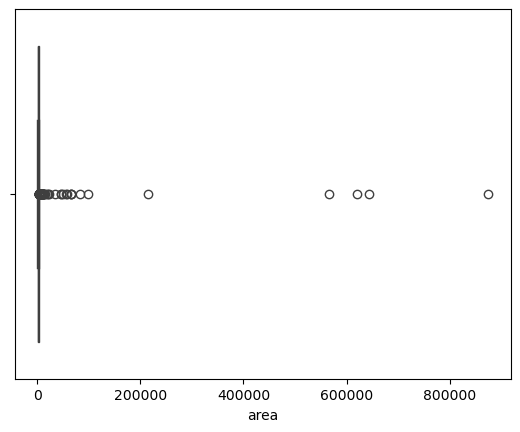

In [253]:
sns.boxplot(x = df['area'])

In [254]:
df['area'].describe()

count      3648.000000
mean       2947.334978
std       23205.023936
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [255]:
df[df['area']>100000]

# Dropping these columns

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
600,signature global solera 2,flat,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
635,signature the roselia,flat,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
740,independent,house,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,0,1,1,0
1191,ramsons kshitij,flat,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
3228,hcbs sports ville,flat,sohna road road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44


In [256]:
df = df[df['area']<100000]

<Axes: xlabel='area', ylabel='Count'>

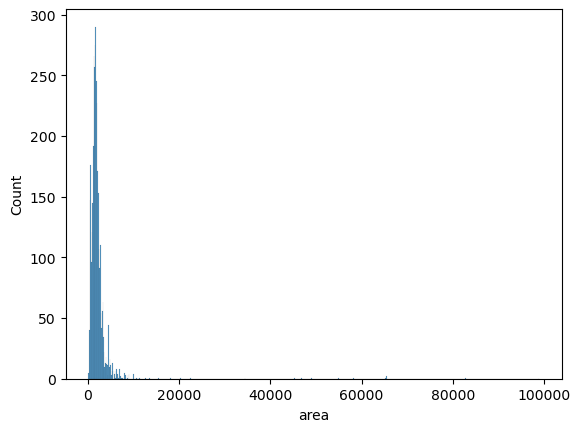

In [257]:
sns.histplot(df['area'])

<Axes: xlabel='area'>

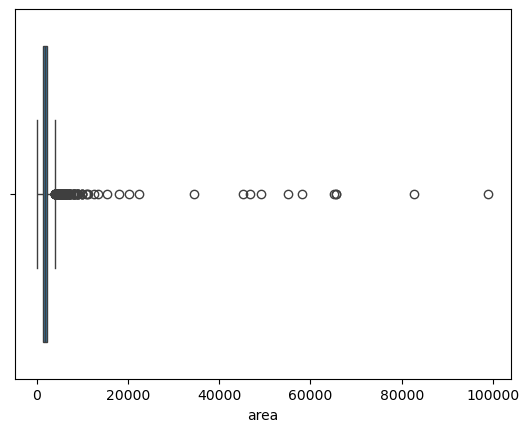

In [258]:
sns.boxplot(x = df['area'])

In [259]:
df[df['area'] > 10000].sort_values('area', ascending = False)

# This much big flats are not normal so will remove them
# Also the 98000 area also will be removed

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
712,independent,house,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,0,0,1,60
1429,ganpati heights apartment,house,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
2330,rof ananda,flat,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
963,rof ananda,flat,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
2166,dlf city plot phase 4,house,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
689,pyramid elite,flat,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
1229,rof ananda,flat,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
3277,signature the serenas,flat,sohna road road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2217,independent,house,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3040,ramsons kshitij,flat,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [265]:
list_to_drop = (df['area'] > 10000) & (df['property_type'] == 'flat')

In [261]:
df.drop(index = 712, inplace = True)

In [267]:
df = df[~(list_to_drop)]

In [291]:
df[df['area']>10000]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
59,independent,house,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,0,1,1,42
511,independent,house,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,0,0
1262,unitech aspen greens,house,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160 sq.yards (1806.04 sq.m.)Carpet area: 1720 sq.yards (1438.14 sq.m.),3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.0,0,1,0,0,0,0,160
1429,ganpati heights apartment,house,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1948,independent,house,sohna road road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 3500 sq.yards (2926.45 sq.m.),3,3,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1,1,0,0,1,0,49
2166,dlf city plot phase 4,house,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.0,0,0,0,0,0,0,0
2217,independent,house,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800 sq.yards (4849.54 sq.m.)Carpet area: 5200 sq.yards (4347.86 sq.m.),9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.0,0,1,1,0,0,1,109
2427,independent,house,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.0,1,1,0,0,1,1,123
2560,independent,house,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 2660 sq.yards (2224.1 sq.m.)Carpet area: 2500 sq.yards (2090.32 sq.m.),9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.0,0,1,0,0,0,1,61


In [293]:
# Manuallly changing few according to area with type column
df.loc[1429, 'area'] = 115 * 9
df.loc[2166, 'area'] = 7250
df.loc[2217, 'area'] = 5800
df.loc[2560, 'area'] = 2660
df.loc[2427, 'area'] = 2850
df.loc[1262, 'area'] = 2160

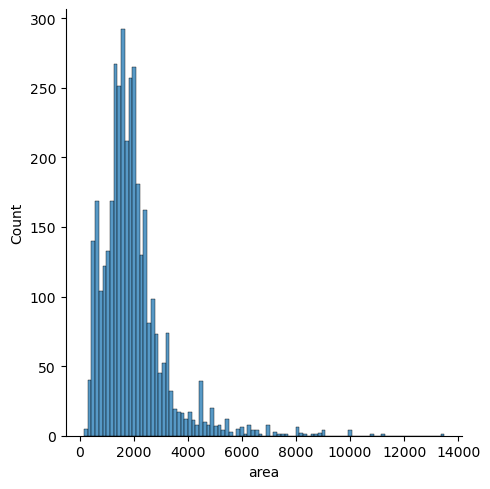

In [297]:
sns.displot(df['area'])

In [299]:
df[df['area']>10000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
59,independent,house,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,0,1,1,42
511,independent,house,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,0,0
1948,independent,house,sohna road road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 3500 sq.yards (2926.45 sq.m.),3,3,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1,1,0,0,1,0,49


In [301]:
df.drop(index = 511, inplace = True)

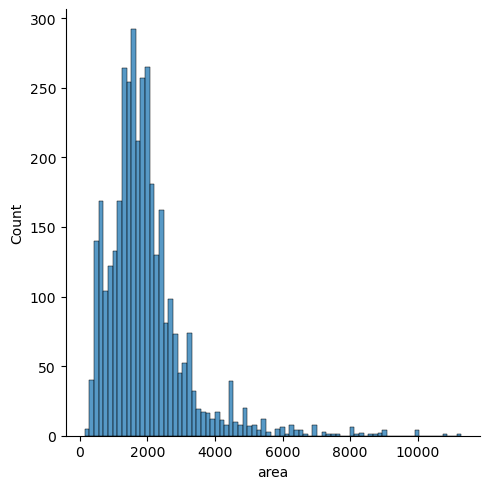

In [303]:
sns.displot(df['area'])

<Axes: xlabel='area'>

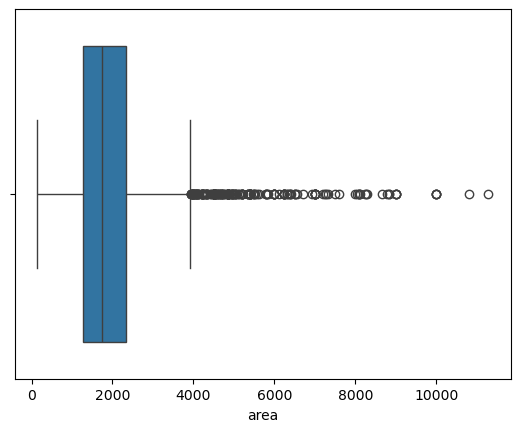

In [305]:
sns.boxplot(x = df['area'])

In [307]:
df['area'].describe()

count     3631.000000
mean      1948.000551
std       1206.677807
min        145.000000
25%       1260.500000
50%       1746.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

# Bedroom Column

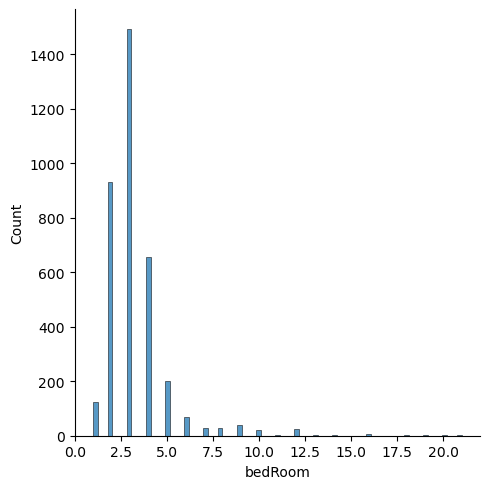

In [310]:
sns.displot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

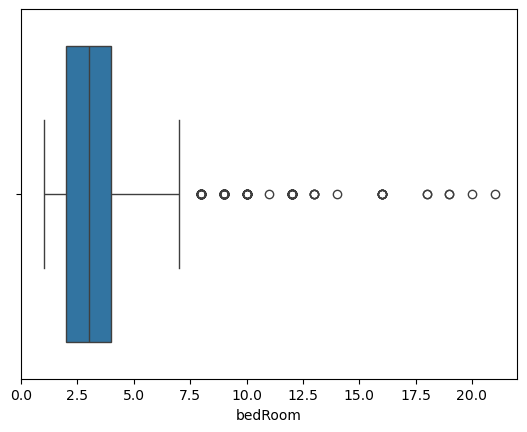

In [312]:
sns.boxplot(x=df['bedRoom'])

In [314]:
df['bedRoom'].describe()

count    3631.000000
mean        3.332966
std         1.830597
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [316]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
2978,independent,house,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
674,independent,house,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
2993,independent,house,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 1622 sq.ft. (150.69 sq.m.),19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,0,0,0,74
3327,independent,house,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 7500 sq.ft. (696.77 sq.m.),19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
2670,independent,house,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1371,private house,house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
2319,independent,house,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,0,0,1,49
1441,independent,house,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20
168,dlf city plots,house,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,0,0,1,153
3288,independent,house,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,0,0,1,0


In [320]:
# Droping these columns as its data error reason being the per room area would be very less
df = df[df['bedRoom'] <= 10]

In [322]:
df.shape

(3586, 23)

<Axes: xlabel='bedRoom'>

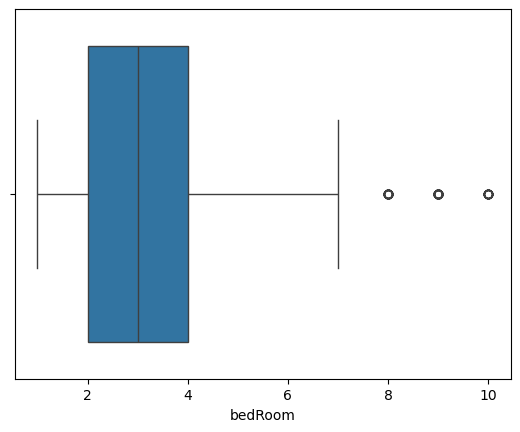

In [324]:
sns.boxplot(x = df['bedRoom'])

# BAthroom column

<Axes: ylabel='bathroom'>

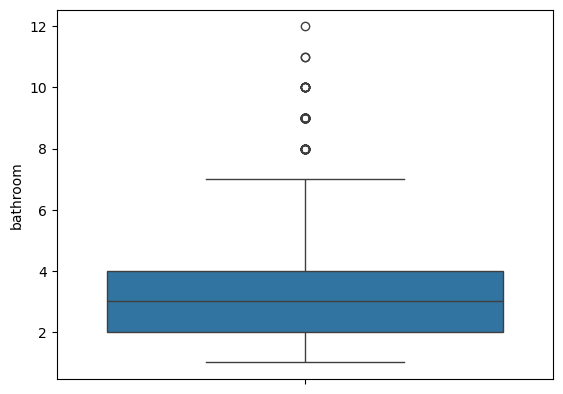

In [329]:
sns.boxplot(df['bathroom'])

In [332]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
3665,adani brahma samsara,house,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
2787,independent,house,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 sq.ft. (650.32 sq.m.),10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,0,0,1,38
3235,independent,house,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: 5000 sq.ft. (464.52 sq.m.),8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,0,1,1,39


# Super Built up area

<Axes: ylabel='super_built_up_area'>

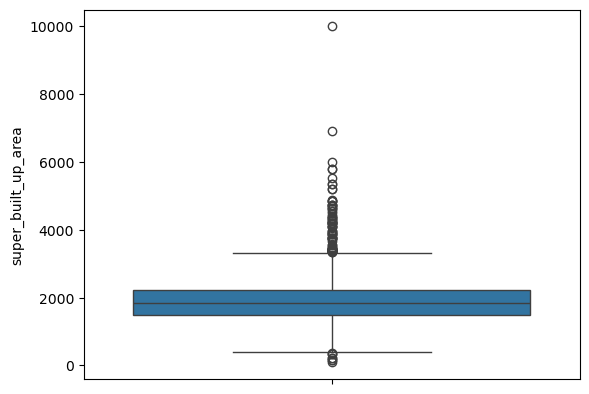

In [335]:
sns.boxplot(df['super_built_up_area'])

In [337]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.930997
std        764.083802
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [339]:
df[df['super_built_up_area'] > 6000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
126,bestech park view grand spa,flat,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
3572,krrish provence estate,flat,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,0,1,0,49


<Axes: xlabel='built_up_area'>

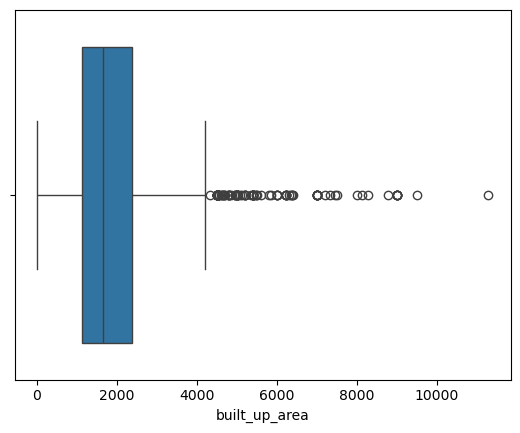

In [342]:
sns.boxplot(x=df['built_up_area'])

<Axes: xlabel='carpet_area'>

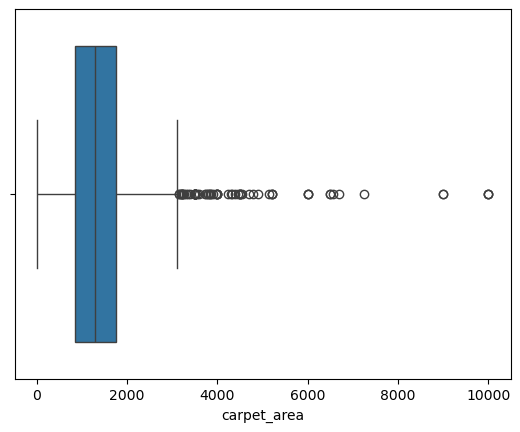

In [344]:
sns.boxplot(x=df['carpet_area'])

In [346]:
df[df['carpet_area'] > 10000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score


<Axes: ylabel='luxury_score'>

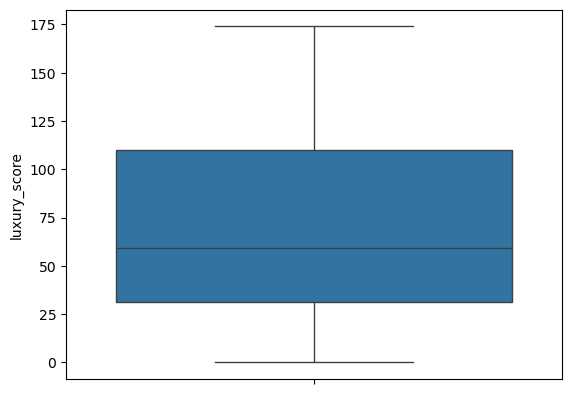

In [348]:
sns.boxplot(df['luxury_score'])

# Price per Square feet

<Axes: ylabel='price_per_sqft'>

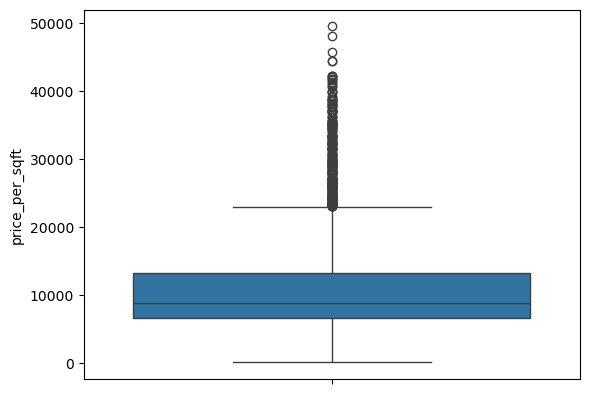

In [354]:
sns.boxplot(df['price_per_sqft'])

In [357]:
df[df['price_per_sqft'] > 42000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
367,dlf city plots,house,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
816,independent,house,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,0,0,2,97
1001,independent,house,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 sq.yards (96.15 sq.m.)Carpet area: 100 sq.yards (83.61 sq.m.),9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
1350,independent,house,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 sq.yards (250.84 sq.m.)Carpet area: 250 sq.yards (209.03 sq.m.),5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,0,0,1,88
2635,independent,house,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
3019,independent,house,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,0,0,2,0
3450,sushant lok 1 builder floors,house,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,0,0,1,7
3453,independent,house,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,0,0,1,60
3533,independent,house,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,0,0,1,103


In [359]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

183.33333333333334

In [361]:
df[(df['area']/df['bedRoom'])<183]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
56,independent,house,sector 4,0.50,9259.0,540.0,Plot area 540(50.17 sq.m.),5,3,2,3.0,West,Old Property,NaN,540.000,NaN,0,0,0,0,0,0,0
93,prem kunj,house,sohna road road,0.50,7407.0,675.0,Plot area 675(62.71 sq.m.)Built Up area: 725 sq.ft. (67.35 sq.m.)Carpet area: 675 sq.ft. (62.71 sq.m.),5,4,3,3.0,South-West,Relatively New,NaN,725.000,675.0,0,0,0,0,0,0,22
130,independent,house,sector 105,0.60,13333.0,450.0,Built Up area: 450 (41.81 sq.m.),3,3,0,3.0,NaN,Undefined,NaN,450.000,NaN,0,0,0,0,0,0,0
231,independent,house,sector 11,0.90,10000.0,900.0,Plot area 900(83.61 sq.m.),7,4,3+,4.0,NaN,Moderately Old,NaN,900.000,NaN,0,0,0,0,0,0,7
259,sector 57 huda,house,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 sq.yards (135.45 sq.m.)Carpet area: 160 sq.yards (133.78 sq.m.),8,8,3+,4.0,East,Relatively New,NaN,162.000,160.0,0,0,1,0,0,1,94
312,independent,house,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.000,NaN,0,0,0,0,0,0,0
448,sector 38 rwa,house,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 sq.yards (137.96 sq.m.)Carpet area: 164 sq.yards (137.12 sq.m.),9,9,3+,3.0,East,Relatively New,NaN,165.000,164.0,0,0,0,0,1,1,41
543,independent,house,sector 104,0.60,5128.0,1170.0,Plot area 130(108.7 sq.m.),7,3,1,2.0,North,Moderately Old,NaN,1170.000,NaN,0,0,0,0,0,0,0
558,rk excelo,house,sector 12,0.60,13333.0,450.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.ft. (2.79 sq.m.)Carpet area: 15 sq.ft. (1.39 sq.m.),5,3,2,3.0,North,Moderately Old,NaN,30.000,15.0,0,0,0,0,1,0,0
570,"bhim nagar, sector 6",house,sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.000,NaN,0,0,0,0,0,0,29
